# 필요한 라이브러리 불러오기

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,159 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import datetime

# Global Variables

In [ ]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/2023April_Dacon/'
args.train_csv = args.default_path + 'train.csv'
args.test_csv = args.default_path + 'test.csv'
args.default_submission_csv = args.default_path+'sample_submission.csv'

args.submission_csv = args.default_path+'submission_0411.csv' # 최적의 모델
args.save_results = args.default_path+"model_results.json" # 모델 정보 저장

# 데이터 분석에 사용할 변수
args.random_state = 7
args.results = []

# Load Data

- ID : 샘플 고유 id
> 항공편 운항 관련 정보
- Month: 해당 항공편의 출발 월
- Day_of_Month: Month에 해당하는 월의 날짜
- Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (HH:MM 형식)
- Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (HH:MM 형식)
- Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
- Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
- Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
- Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
- Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
- Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
- Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
- Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
- Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
- Airline: 해당 항공편을 운항하는 항공사
- Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 
(IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
- Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
- Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
- Delay: 항공편 지연 여부 (Not_Delayed, Delayed) : 예측해야 하는 타깃

In [ ]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape

((1000000, 19), (1000000, 18))

In [ ]:
ori_train.isna().sum(), ori_test.isna().sum()

(month                            0
 day_of_month                     0
 estimated_departure_time    109019
 estimated_arrival_time      109040
 cancelled                        0
 diverted                         0
 origin_airport                   0
 origin_airport_id                0
 origin_state                109015
 destination_airport              0
 destination_airport_id           0
 destination_state           109079
 distance                         0
 airline                     108920
 carrier_code(iata)          108990
 carrier_id(dot)             108997
 tail_number                      0
 delay                       744999
 dtype: int64,
 month                            0
 day_of_month                     0
 estimated_departure_time    108984
 estimated_arrival_time      109048
 cancelled                        0
 diverted                         0
 origin_airport                   0
 origin_airport_id                0
 origin_state                106505
 destination_

In [ ]:
ori_train.nunique()

month                         12
day_of_month                  31
estimated_departure_time    1365
estimated_arrival_time      1428
cancelled                      1
diverted                       1
origin_airport               374
origin_airport_id            374
origin_state                  52
destination_airport          375
destination_airport_id       375
destination_state             52
distance                    1597
airline                       28
carrier_code(iata)            11
carrier_id(dot)               28
tail_number                 6430
delay                          2
dtype: int64

In [ ]:
ori_train.head()

,month,day_of_month,estimated_departure_time,estimated_arrival_time,cancelled,diverted,origin_airport,origin_airport_id,origin_state,destination_airport,destination_airport_id,destination_state,distance,airline,carrier_code(iata),carrier_id(dot),tail_number,delay
0,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN


In [ ]:
# 컬럼명 소문자로 바꾸기
ori_train.columns = ori_train.columns.str.lower()
ori_test.columns = ori_test.columns.str.lower()

In [ ]:
ori_train['id'].nunique(), ori_train.shape[0]

(1000000, 1000000)

In [ ]:
ori_train.drop('id', axis=1, inplace=True)
ori_train.head()

,month,day_of_month,estimated_departure_time,estimated_arrival_time,cancelled,diverted,origin_airport,origin_airport_id,origin_state,destination_airport,destination_airport_id,destination_state,distance,airline,carrier_code(iata),carrier_id(dot),tail_number,delay
0,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN


In [ ]:
# 테스트세트 인덱스 id로 고정하기
ori_test.set_index(['id'], inplace=True) 
ori_test.head()

,month,day_of_month,estimated_departure_time,estimated_arrival_time,cancelled,diverted,origin_airport,origin_airport_id,origin_state,destination_airport,destination_airport_id,destination_state,distance,airline,carrier_code(iata),carrier_id(dot),tail_number
id,,,,,,,,,,,,,,,,,
TEST_000000,12,16,1156.0,NaN,0,0,IAH,12266,Texas,SAT,14683,Texas,191.0,United Air Lines Inc.,UA,NaN,N79402
TEST_000001,9,12,1500.0,1715.0,0,0,EWR,11618,New Jersey,ATL,10397,NaN,746.0,Delta Air Lines Inc.,DL,19790.0,N3765
TEST_000002,3,6,1600.0,1915.0,0,0,ORD,13930,Illinois,LGA,12953,New York,733.0,United Air Lines Inc.,UA,19977.0,N413UA
TEST_000003,5,18,1920.0,2045.0,0,0,OAK,13796,California,LAX,12892,California,337.0,Southwest Airlines Co.,WN,19393.0,N905WN
TEST_000004,7,7,1915.0,2152.0,0,0,FLL,11697,Florida,LAX,12892,California,2343.0,JetBlue Airways,B6,20409.0,N945JT


# train_test_split

In [ ]:
# 트레이닝 세트의 타깃 상태 확인
new_delayed = pd.Categorical(ori_train["delay"])           

new_delayed.describe()

,counts,freqs
categories,,
Delayed,45000,0.045000
Not_Delayed,210001,0.210001
NaN,744999,0.744999


In [ ]:
# 결측치 있는 데이터 분리
ori_train_miss = ori_train[ori_train["delay"].isnull()==True]
ori_train_complete = ori_train[ori_train["delay"].isnull()==False]

ori_train_complete.head()

,month,day_of_month,estimated_departure_time,estimated_arrival_time,cancelled,diverted,origin_airport,origin_airport_id,origin_state,destination_airport,destination_airport_id,destination_state,distance,airline,carrier_code(iata),carrier_id(dot),tail_number,delay
5,4,13,1545.0,NaN,0,0,EWR,11618,NaN,DCA,11278,Virginia,199.0,Republic Airlines,UA,20452.0,N657RW,Not_Delayed
6,1,20,1742.0,1903.0,0,0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,UA,NaN,N66825,Not_Delayed
8,6,13,1420.0,1550.0,0,0,BWI,10821,NaN,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,WN,19393.0,N765SW,Not_Delayed
10,8,13,1730.0,1844.0,0,0,DCA,11278,Virginia,PIT,14122,Pennsylvania,204.0,Republic Airlines,AA,NaN,N119HQ,Delayed
12,1,12,1015.0,1145.0,0,0,CLE,11042,Ohio,DEN,11292,Colorado,1201.0,Southwest Airlines Co.,WN,NaN,N8696E,Not_Delayed


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = ori_train_complete['delay']
X = ori_train_complete.drop(['delay'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=ori_train_complete['delay'], random_state=args.random_state)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((178500, 17), (76501, 17), (178500,), (76501,))

In [ ]:
train = X_train.copy()
test = X_test.copy()
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((178500, 17), (76501, 17), (1000000, 17))

# Preprocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178500 entries, 214434 to 907188
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   month                     178500 non-null  int64  
 1   day_of_month              178500 non-null  int64  
 2   estimated_departure_time  159022 non-null  float64
 3   estimated_arrival_time    159030 non-null  float64
 4   cancelled                 178500 non-null  int64  
 5   diverted                  178500 non-null  int64  
 6   origin_airport            178500 non-null  object 
 7   origin_airport_id         178500 non-null  int64  
 8   origin_state              159014 non-null  object 
 9   destination_airport       178500 non-null  object 
 10  destination_airport_id    178500 non-null  int64  
 11  destination_state         159101 non-null  object 
 12  distance                  178500 non-null  float64
 13  airline                   159287 non-nu

### 시간 전처리 (출발)

In [ ]:
# 결측치는 0000, 나머지는 str으로 변환
train['estimated_departure_time'] = train['estimated_departure_time'].apply(lambda x: "0000" if pd.isna(x) else str(int(x)).zfill(4))
train['estimated_departure_time'].head()

214434    2205
249946    0000
411022    0701
686043    1320
406289    0839
Name: estimated_departure_time, dtype: object

In [ ]:
# 시간 형태로 고치기 
train['estimated_departure_time'] = train['estimated_departure_time'].apply(lambda x: x[:-2] + ":" + x[-2:])
train['estimated_departure_time'].head()

214434    22:05
249946    00:00
411022    07:01
686043    13:20
406289    08:39
Name: estimated_departure_time, dtype: object

In [ ]:
# 24시는 00시로 바꾸기(datetime 오류)
train['estimated_departure_time'] = train['estimated_departure_time'].apply(lambda x: "00:00" if x == "24:00" else x)

In [ ]:
train['estimated_departure_time_t'] = train['estimated_departure_time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))
# train['estimated_departure_time_t'] = train['estimated_departure_time_t'].apply(lambda x: x.strftime('%H:%M'))

In [ ]:
train['estimated_departure_time_t'].head()

214434   1900-01-01 22:05:00
249946   1900-01-01 00:00:00
411022   1900-01-01 07:01:00
686043   1900-01-01 13:20:00
406289   1900-01-01 08:39:00
Name: estimated_departure_time_t, dtype: datetime64[ns]

In [ ]:
test['estimated_departure_time'] = test['estimated_departure_time'].apply(lambda x: "0000" if pd.isna(x) else str(int(x)).zfill(4))
test['estimated_departure_time'] = test['estimated_departure_time'].apply(lambda x: x[:-2] + ":" + x[-2:])
test['estimated_departure_time'] = test['estimated_departure_time'].apply(lambda x: "00:00" if x == "24:00" else x)
test['estimated_departure_time_t'] = test['estimated_departure_time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))

ori_te['estimated_departure_time'] = ori_te['estimated_departure_time'].apply(lambda x: "0000" if pd.isna(x) else str(int(x)).zfill(4))
ori_te['estimated_departure_time'] = ori_te['estimated_departure_time'].apply(lambda x: x[:-2] + ":" + x[-2:])
ori_te['estimated_departure_time'] = ori_te['estimated_departure_time'].apply(lambda x: "00:00" if x == "24:00" else x)
ori_te['estimated_departure_time_t'] = ori_te['estimated_departure_time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))

### 시간 전처리 (도착)

In [ ]:
train['estimated_arrival_time'] = train['estimated_arrival_time'].apply(lambda x: "0000" if pd.isna(x) else str(int(x)).zfill(4))
train['estimated_arrival_time'].head()

214434    0008
249946    0924
411022    0837
686043    1450
406289    0915
Name: estimated_arrival_time, dtype: object

In [ ]:
train['estimated_arrival_time'] = train['estimated_arrival_time'].apply(lambda x: x[:-2] + ":" + x[-2:])
train['estimated_arrival_time'].head()

214434    00:08
249946    09:24
411022    08:37
686043    14:50
406289    09:15
Name: estimated_arrival_time, dtype: object

In [ ]:
train['estimated_arrival_time'] = train['estimated_arrival_time'].apply(lambda x: "00:00" if x == "24:00" else x)

In [ ]:
train['estimated_arrival_time_t'] = train['estimated_arrival_time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))
# train['estimated_arrival_time_t'] = train['estimated_arrival_time_t'].apply(lambda x: x.strftime('%H:%M'))

In [ ]:
train['estimated_arrival_time_t'].head()

214434   1900-01-01 00:08:00
249946   1900-01-01 09:24:00
411022   1900-01-01 08:37:00
686043   1900-01-01 14:50:00
406289   1900-01-01 09:15:00
Name: estimated_arrival_time_t, dtype: datetime64[ns]

In [ ]:
test['estimated_arrival_time'] = test['estimated_arrival_time'].apply(lambda x: "0000" if pd.isna(x) else str(int(x)).zfill(4))
test['estimated_arrival_time'] = test['estimated_arrival_time'].apply(lambda x: x[:-2] + ":" + x[-2:])
test['estimated_arrival_time'] = test['estimated_arrival_time'].apply(lambda x: "00:00" if x == "24:00" else x)
test['estimated_arrival_time_t'] = test['estimated_arrival_time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))

In [ ]:
ori_te['estimated_arrival_time'] = ori_te['estimated_arrival_time'].apply(lambda x: "0000" if pd.isna(x) else str(int(x)).zfill(4))
ori_te['estimated_arrival_time'] = ori_te['estimated_arrival_time'].apply(lambda x: x[:-2] + ":" + x[-2:])
ori_te['estimated_arrival_time'] = ori_te['estimated_arrival_time'].apply(lambda x: "00:00" if x == "24:00" else x)
ori_te['estimated_arrival_time_t'] = ori_te['estimated_arrival_time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))

### 항공기 고유 id 전처리

In [ ]:
train[train['carrier_id(dot)']==19977.0]

,month,day_of_month,estimated_departure_time,estimated_arrival_time,cancelled,diverted,origin_airport,origin_airport_id,origin_state,destination_airport,destination_airport_id,destination_state,distance,airline,carrier_code(iata),carrier_id(dot),tail_number,estimated_departure_time_t,estimated_arrival_time_t
686043,7,23,13:20,14:50,0,0,BIL,10620,Montana,DEN,11292,Colorado,455.0,United Air Lines Inc.,UA,19977.0,N838UA,1900-01-01 13:20:00,1900-01-01 14:50:00
780585,8,3,09:07,10:20,0,0,MSP,13487,Minnesota,DEN,11292,Colorado,680.0,United Air Lines Inc.,UA,19977.0,N809UA,1900-01-01 09:07:00,1900-01-01 10:20:00
474899,12,28,13:03,21:03,0,0,SFO,14771,NaN,IAD,12264,Virginia,2419.0,United Air Lines Inc.,UA,19977.0,N47414,1900-01-01 13:03:00,1900-01-01 21:03:00
242690,6,24,15:35,18:36,0,0,EWR,11618,New Jersey,MCO,13204,Florida,937.0,United Air Lines Inc.,UA,19977.0,N442UA,1900-01-01 15:35:00,1900-01-01 18:36:00
749243,1,2,15:25,17:16,0,0,PDX,14057,Oregon,SFO,14771,California,550.0,United Air Lines Inc.,NaN,19977.0,N28457,1900-01-01 15:25:00,1900-01-01 17:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459867,6,25,08:30,11:04,0,0,MCO,13204,NaN,EWR,11618,New Jersey,937.0,United Air Lines Inc.,UA,19977.0,N35204,1900-01-01 08:30:00,1900-01-01 11:04:00
731985,9,6,19:45,21:50,0,0,CLT,11057,North Carolina,EWR,11618,NaN,529.0,United Air Lines Inc.,UA,19977.0,N404UA,1900-01-01 19:45:00,1900-01-01 21:50:00
731027,10,4,00:00,00:00,0,0,SFO,14771,NaN,BOS,10721,Massachusetts,2704.0,United Air Lines Inc.,NaN,19977.0,N14107,1900-01-01 00:00:00,1900-01-01 00:00:00
242780,7,2,14:30,16:21,0,0,BOI,10713,NaN,DEN,11292,Colorado,649.0,NaN,UA,19977.0,N412UA,1900-01-01 14:30:00,1900-01-01 16:21:00


In [ ]:
train[train['airline'].isnull()][20:40]

,month,day_of_month,estimated_departure_time,estimated_arrival_time,cancelled,diverted,origin_airport,origin_airport_id,origin_state,destination_airport,destination_airport_id,destination_state,distance,airline,carrier_code(iata),carrier_id(dot),tail_number,estimated_departure_time_t,estimated_arrival_time_t
411658,9,19,06:00,07:16,0,0,CHO,10990,Virginia,LGA,12953,New York,305.0,NaN,DL,20363.0,N8918B,1900-01-01 06:00:00,1900-01-01 07:16:00
229527,8,29,16:53,20:19,0,0,DEN,11292,Colorado,ORD,13930,Illinois,888.0,NaN,UA,19977.0,N36469,1900-01-01 16:53:00,1900-01-01 20:19:00
629738,6,12,18:34,19:34,0,0,TWF,15389,Idaho,SLC,14869,Utah,175.0,NaN,DL,20304.0,N8903A,1900-01-01 18:34:00,1900-01-01 19:34:00
886531,12,23,08:00,09:34,0,0,ICT,12278,Kansas,DFW,11298,Texas,328.0,NaN,AA,19805.0,N748UW,1900-01-01 08:00:00,1900-01-01 09:34:00
481109,10,4,00:00,21:07,0,0,ATL,10397,Georgia,DAB,11252,Florida,366.0,NaN,DL,19790.0,N962DL,1900-01-01 00:00:00,1900-01-01 21:07:00
121152,9,27,11:36,12:29,0,0,COS,11109,Colorado,DEN,11292,Colorado,73.0,NaN,UA,19977.0,N433UA,1900-01-01 11:36:00,1900-01-01 12:29:00
956209,8,11,21:00,00:00,0,0,SEA,14747,NaN,EWR,11618,New Jersey,2402.0,NaN,UA,19977.0,N14249,1900-01-01 21:00:00,1900-01-01 00:00:00
45276,6,10,11:05,13:00,0,0,BDL,10529,Connecticut,MYR,13577,South Carolina,664.0,NaN,NaN,20416.0,N612NK,1900-01-01 11:05:00,1900-01-01 13:00:00
449796,10,30,12:30,17:08,0,0,BOI,10713,Idaho,ORD,13930,Illinois,1437.0,NaN,UA,20304.0,N168SY,1900-01-01 12:30:00,1900-01-01 17:08:00
725681,8,31,14:00,19:07,0,0,LAX,12892,California,MCI,13198,Missouri,1363.0,NaN,DL,19790.0,N328NW,1900-01-01 14:00:00,1900-01-01 19:07:00


In [ ]:
id = train["carrier_id(dot)"].copy()
air = train['airline'].copy()

In [ ]:
# 항공사의 최빈 id 구하기 

df_airline = pd.concat([air, id], axis=1)
df_airline = df_airline.groupby(by='airline')[['carrier_id(dot)']].agg(pd.Series.mode)
df_airline = df_airline.rename(columns={'carrier_id(dot)':'id'})
df_airline

,id
airline,
Air Wisconsin Airlines Corp,20046.0
Alaska Airlines Inc.,19930.0
Allegiant Air,20368.0
American Airlines Inc.,19805.0
Cape Air,20253.0
Capital Cargo International,20427.0
Comair Inc.,20397.0
"Commutair Aka Champlain Enterprises, Inc.",20445.0
Compass Airlines,21167.0


In [ ]:
train = pd.merge(train, df_airline, on='airline', how='left')
test = pd.merge(test, df_airline, on='airline', how='left')
ori_te = pd.merge(ori_te, df_airline, on='airline', how='left')

In [ ]:
# 결측치를 각 항공사의 최빈값으로 채움

train['carrier_id(dot)'].fillna(train['id'], inplace=True)
test['carrier_id(dot)'].fillna(test['id'], inplace=True)
ori_te['carrier_id(dot)'].fillna(ori_te['id'], inplace=True)

In [ ]:

# 필요 없는 열 삭제

print(f'before: {train.shape} / {test.shape}')
drop_cols = ['airline','carrier_code(iata)', 'id']

train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)
ori_te.drop(drop_cols, axis=1, inplace=True)

print(f'after: {train.shape} / {test.shape}')
train.info()

before: (178500, 20) / (76501, 20)
after: (178500, 17) / (76501, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178500 entries, 0 to 178499
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   month                       178500 non-null  int64         
 1   day_of_month                178500 non-null  int64         
 2   estimated_departure_time    178500 non-null  object        
 3   estimated_arrival_time      178500 non-null  object        
 4   cancelled                   178500 non-null  int64         
 5   diverted                    178500 non-null  int64         
 6   origin_airport              178500 non-null  object        
 7   origin_airport_id           178500 non-null  int64         
 8   origin_state                159014 non-null  object        
 9   destination_airport         178500 non-null  object        
 10  destination_airport_id      178500 

In [ ]:
origin_state_mode = train['origin_state'].mode().values[0]
destination_state_mode = train['destination_state'].mode().values[0]
carrier_id_mode = train["carrier_id(dot)"].mode().values[0]

origin_state_mode, destination_state_mode, carrier_id_mode

('California', 'California', 19393.0)

In [ ]:
train['origin_state'].fillna(origin_state_mode, inplace=True)
test['origin_state'].fillna(origin_state_mode, inplace=True)
ori_te['origin_state'].fillna(origin_state_mode, inplace=True)

train['destination_state'].fillna(destination_state_mode, inplace=True)
test['destination_state'].fillna(destination_state_mode, inplace=True)
ori_te['destination_state'].fillna(destination_state_mode, inplace=True)

train['carrier_id(dot)'].fillna(carrier_id_mode, inplace=True)
test['carrier_id(dot)'].fillna(carrier_id_mode, inplace=True)
ori_te['carrier_id(dot)'].fillna(carrier_id_mode, inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

(0, 0, 0)

# Features

In [ ]:
train.shape, y_train.shape, ori_te.shape

((178500, 17), (178500,), (1000000, 23))

In [ ]:
# EDA용 Data
eda_df = pd.concat([train, y_train.reset_index(drop=True)], axis = 1)

In [ ]:
ori_te.columns

Index(['month', 'day_of_month', 'estimated_departure_time',
       'estimated_arrival_time', 'cancelled', 'diverted', 'origin_airport',
       'origin_airport_id', 'origin_state', 'destination_airport',
       'destination_airport_id', 'destination_state', 'distance',
       'carrier_id(dot)', 'tail_number', 'estimated_departure_time_t',
       'estimated_arrival_time_t', 'date', 'dep_time', 'arr_time',
       'distance_cat', 'tail_num1', 'tail_num2'],
      dtype='object')

## Month / Day of Month

In [ ]:
eda_df.month.unique()

array([12,  3,  6,  7,  5, 10,  8,  9,  4, 11,  2,  1])

In [ ]:
eda_df.day_of_month.unique()

array([27, 31,  6, 23,  3, 22, 20, 26,  8, 14,  9, 18, 11, 21, 28, 24, 25,
       12, 19, 17, 13, 15, 10,  1,  5,  7,  2, 16, 30,  4, 29])

- date: 월 + 일 형태로 변환

In [ ]:
eda_df['date'] = (eda_df.apply(lambda x: str(x.month).zfill(2) + str(x.day_of_month).zfill(2), axis = 1))

ori_te['date'] = (ori_te.apply(lambda x: str(x.month).zfill(2) + str(x.day_of_month).zfill(2), axis = 1))

## Arrival time / Departure time(시간 별 범주화)
- arr_time, dep_time

In [ ]:
eda_df['arr_time_m'] = eda_df['estimated_arrival_time_t'].dt.minute.value_counts()
eda_df['dep_time_m'] = eda_df['estimated_departure_time_t'].dt.minute.value_counts()

ori_te['arr_time_m'] = ori_te['estimated_arrival_time_t'].dt.minute.value_counts()
ori_te['dep_time_m'] = ori_te['estimated_departure_time_t'].dt.minute.value_counts()

In [ ]:
ori_te['arr_time_m'].isna().sum(), ori_te['dep_time_m'].isna().sum()

(999940, 999940)

In [ ]:
def time_m_processing(x):
  

In [ ]:
eda_df['estimated_departure_time_t'].dt.minute.value_counts()

In [ ]:
# datetime 변수 시간대 별 범주화
eda_df['dep_time_h'] = pd.cut(eda_df['estimated_departure_time_t'].dt.hour,
                           bins=[i for i in range(-1,25)],
                           labels=[i for i in range(0,25)])

eda_df['arr_time_h'] = pd.cut(eda_df['estimated_arrival_time_t'].dt.hour,
                           bins=[i for i in range(-1,25)],
                           labels=[i for i in range(0,25)])


ori_te['dep_time_h'] = pd.cut(ori_te['estimated_departure_time_t'].dt.hour,
                           bins=[i for i in range(-1,25)],
                           labels=[i for i in range(0,25)])

ori_te['arr_time_h'] = pd.cut(ori_te['estimated_arrival_time_t'].dt.hour,
                           bins=[i for i in range(-1,25)],
                           labels=[i for i in range(0,25)])

## Distance(범주화 or 수치형)
### distance_cat


In [ ]:
eda_df.distance.sum() - eda_df.distance.astype('i').sum(), eda_df.distance.max()
# int16 타입으로 변환해도 무관함

(0.0, 5095.0)

- distance_cat: distance 사분위수로 범주화

In [ ]:
eda_df['distance'].describe()

count    178500.000000
mean        779.741249
std         588.408246
min          16.000000
25%         349.000000
50%         621.000000
75%        1013.000000
max        5095.000000
Name: distance, dtype: float64

In [ ]:
def dis_group(x):
  result = 0
  if x <=  349.000000:
    result = 0
  elif x <= 621.000000:
    result = 1
  elif x <= 1013.000000:
    result = 2
  else:
    result = 3
  return result

In [ ]:
eda_df['distance_cat'] = eda_df['distance'].map(lambda x : dis_group(x))

ori_te['distance_cat'] = ori_te['distance'].map(lambda x : dis_group(x))

## Origin airport / Destination airport(Code만 사용)

## Carrier Code

## Cancelled / Diverted(Drop)

In [ ]:
eda_df.cancelled.nunique(), eda_df.diverted.nunique()
# 의미 없는 feature

(1, 1)

 ## Tail number
  : 국적 기호, 항공기 종류, 엔진 수로 분할

 1. 국적 기호
> - 한국 HL
> - 미국 N
> - 일본 JA
> - 독일 D
> - 프랑스 F
> - 영국 G
> - 중국 B
> - 스위스 HB
> - 호주 VH

2. 항공기 종류
> - 1/2 피스톤 엔진 비행
> - 5 터보프롭 엔진 비행기
> - 6 피스톤 엔진 헬기
> - 7/8 터보제트 엔진 비행
> - 9 터빈 엔진 헬기

3. 엔진 수


In [ ]:
eda_df.tail_number[eda_df.tail_number.str.len()==6]

0         N935AE
1         N504MJ
2         N120HQ
3         N838UA
4         N483HA
           ...  
178495    N907FJ
178496    N304FR
178497    N906EV
178498    N170US
178499    N257SY
Name: tail_number, Length: 175432, dtype: object

In [ ]:
eda_df.tail_number.str.extract(r'(\d+)')[0].str[0].value_counts()

9    27726
8    26222
7    22250
4    19492
6    18770
2    18525
1    16848
3    15764
5    12903
Name: 0, dtype: int64

In [ ]:
# tail number에서 숫자만 뽑아낸 뒤 첫 번째, 두 번째 숫자만 가져와 컬럼 생성
eda_df['tail_num1'] = eda_df.tail_number.str.extract(r'(\d+)')[0].str[0]
eda_df['tail_num2'] = eda_df.tail_number.str.extract(r'(\d+)')[0].str[1]

ori_te['tail_num1'] = ori_te.tail_number.str.extract(r'(\d+)')[0].str[0]
ori_te['tail_num2'] = ori_te.tail_number.str.extract(r'(\d+)')[0].str[1]

## Origin State / Destination State

In [ ]:
set(eda_df.origin_state.unique()) == set(eda_df.destination_state.unique())

True

## Delay(Target)

In [ ]:
eda_df[eda_df.delay.isnull()]

,month,day_of_month,estimated_departure_time,estimated_arrival_time,cancelled,diverted,origin_airport,origin_airport_id,origin_state,destination_airport,...,tail_number,estimated_departure_time_t,estimated_arrival_time_t,delay,date,dep_time,arr_time,distance_cat,tail_num1,tail_num2


In [ ]:
eda_df.delay = eda_df.delay.map(lambda x: 1 if x == "Delayed" else 0)
eda_df.delay.sum()

31500

## 타입 변환 / Drop columns

In [ ]:
pred_df = eda_df.copy()
ori_te2 = ori_te.copy()

In [ ]:
pred_df.columns

Index(['month', 'day_of_month', 'estimated_departure_time',
       'estimated_arrival_time', 'cancelled', 'diverted', 'origin_airport',
       'origin_airport_id', 'origin_state', 'destination_airport',
       'destination_airport_id', 'destination_state', 'distance',
       'carrier_id(dot)', 'tail_number', 'estimated_departure_time_t',
       'estimated_arrival_time_t', 'delay', 'date', 'dep_time', 'arr_time',
       'distance_cat', 'tail_num1', 'tail_num2'],
      dtype='object')

In [ ]:
object_cols = ['month', 'day_of_month','origin_airport_id','origin_state', 
       'destination_airport_id', 'destination_state', 'carrier_id(dot)', 
       'date', 'dep_time', 'arr_time','distance_cat','tail_num1', 'tail_num2']
       
drop_cols =['month', 'day_of_month', 'estimated_departure_time',
       'estimated_arrival_time', 'cancelled', 'diverted','origin_airport',
       'destination_airport','tail_number', 'estimated_departure_time_t',
       'estimated_arrival_time_t']

len(object_cols + drop_cols), len(pred_df.columns)

(24, 24)

In [ ]:
def astype_object(data, col_list):
  for cols in col_list:
    data[cols] = data[cols].astype('category')
  return

In [ ]:
pred_df.distance = pred_df.distance.astype('int16')
astype_object(pred_df, object_cols)

ori_te2.distance = ori_te2.distance.astype('int16')
astype_object(ori_te2, object_cols)

In [ ]:
pred_df.drop(columns = drop_cols, inplace = True)

ori_te2.drop(columns = drop_cols, inplace = True)

In [ ]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178500 entries, 0 to 178499
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   origin_airport_id       178500 non-null  category
 1   origin_state            178500 non-null  category
 2   destination_airport_id  178500 non-null  category
 3   destination_state       178500 non-null  category
 4   distance                178500 non-null  int16   
 5   carrier_id(dot)         178500 non-null  category
 6   delay                   178500 non-null  int64   
 7   date                    178500 non-null  category
 8   dep_time                178500 non-null  category
 9   arr_time                178500 non-null  category
 10  distance_cat            178500 non-null  category
 11  tail_num1               178500 non-null  category
 12  tail_num2               178500 non-null  category
dtypes: category(11), int16(1), int64(1)
memory usage: 5.5 MB


In [ ]:
ori_te2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   origin_airport_id       1000000 non-null  category
 1   origin_state            1000000 non-null  category
 2   destination_airport_id  1000000 non-null  category
 3   destination_state       1000000 non-null  category
 4   distance                1000000 non-null  int16   
 5   carrier_id(dot)         1000000 non-null  category
 6   date                    1000000 non-null  category
 7   dep_time                1000000 non-null  category
 8   arr_time                1000000 non-null  category
 9   distance_cat            1000000 non-null  category
 10  tail_num1               1000000 non-null  category
 11  tail_num2               1000000 non-null  category
dtypes: category(11), int16(1)
memory usage: 22.9 MB


# Binary Encoding


In [ ]:
pred_df.delay.sum()

31500

In [ ]:
pred_df.columns

Index(['origin_airport_id', 'origin_state', 'destination_airport_id',
       'destination_state', 'distance', 'carrier_id(dot)', 'delay', 'date',
       'dep_time', 'arr_time', 'distance_cat', 'tail_num1', 'tail_num2'],
      dtype='object')

In [ ]:
cols_encoding = ['origin_airport_id', 'origin_state', 'destination_airport_id',
       'destination_state', 'carrier_id(dot)', 'date',
       'dep_time', 'arr_time', 'tail_num1', 'tail_num2','distance_cat']

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
no_enco_pred_df = pred_df[['delay', 'distance']]
no_enco_ori_te = ori_te['distance']

In [ ]:
import category_encoders as ce

binary = ce.BinaryEncoder(cols = cols_encoding).fit_transform(pred_df[cols_encoding])
pred_df = pd.concat([no_enco_pred_df, binary], axis = 1)

binary = ce.BinaryEncoder(cols = cols_encoding).fit_transform(ori_te[cols_encoding])
ori_te = pd.concat([no_enco_ori_te, binary], axis = 1)

pred_df

,delay,distance,origin_airport_id_0,origin_airport_id_1,origin_airport_id_2,origin_airport_id_3,origin_airport_id_4,origin_airport_id_5,origin_airport_id_6,origin_airport_id_7,...,tail_num1_1,tail_num1_2,tail_num1_3,tail_num2_0,tail_num2_1,tail_num2_2,tail_num2_3,distance_cat_0,distance_cat_1,distance_cat_2
0,1,213.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,135.0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,347.0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,455.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
4,0,102.0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178495,0,312.0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
178496,1,1015.0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,1,1
178497,1,177.0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
178498,0,2279.0,0,0,0,0,1,1,1,0,...,0,1,1,0,1,1,0,0,1,1


In [ ]:
pred_df.columns , ori_te.columns

(Index(['delay', 'distance', 'origin_airport_id_0', 'origin_airport_id_1',
        'origin_airport_id_2', 'origin_airport_id_3', 'origin_airport_id_4',
        'origin_airport_id_5', 'origin_airport_id_6', 'origin_airport_id_7',
        'origin_airport_id_8', 'origin_state_0', 'origin_state_1',
        'origin_state_2', 'origin_state_3', 'origin_state_4', 'origin_state_5',
        'destination_airport_id_0', 'destination_airport_id_1',
        'destination_airport_id_2', 'destination_airport_id_3',
        'destination_airport_id_4', 'destination_airport_id_5',
        'destination_airport_id_6', 'destination_airport_id_7',
        'destination_airport_id_8', 'destination_state_0',
        'destination_state_1', 'destination_state_2', 'destination_state_3',
        'destination_state_4', 'destination_state_5', 'carrier_id(dot)_0',
        'carrier_id(dot)_1', 'carrier_id(dot)_2', 'carrier_id(dot)_3',
        'carrier_id(dot)_4', 'date_0', 'date_1', 'date_2', 'date_3', 'date_4',
       

# Training

In [ ]:
X = pred_df.drop(columns = ['delay'])
y = pred_df['delay']

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((124950, 12), (53550, 12), (124950,), (53550,))

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss

clf = LGBMClassifier()
model = clf.fit(X_tr, y_tr)



In [ ]:
top_features = pd.Series(model.feature_importances_, index = X_tr.columns).sort_values(ascending = False)[-20:]

In [ ]:
top_features

date                      1654
destination_airport_id     575
origin_airport_id          538
carrier_id(dot)             69
dep_time                    55
arr_time                    47
distance                    19
tail_num2                   12
tail_num1                   11
origin_state                10
destination_state           10
distance_cat                 0
dtype: int32

In [ ]:
pred = model.predict_proba(X_te)
logloss = log_loss(y_te, pred)
model.score(X_te,y_te), logloss

(0.8216433239962652, 0.4456222130417212)

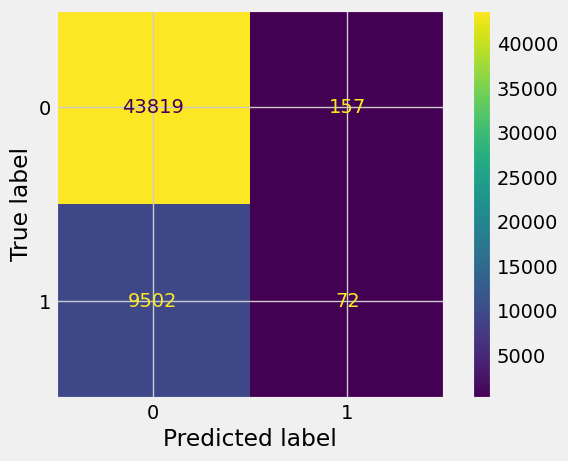

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict # 교차검증
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

y_test_pred = rf.fit(X_tr, y_tr).predict(X_te)

cm = confusion_matrix(y_te, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
pred = model.predict_proba(ori_te)

In [ ]:
pred

In [ ]:
sample_submission = pd.read_csv(args.default_submission_csv)
sample_submission.head()

In [ ]:
pred_sub = pd.DataFrame(data = pred, columns=['Not_Delayed', 'Delayed'])
pred_sub.head()

In [ ]:
sample_submission.ID

In [ ]:
submission = pd.concat([sample_submission.ID, pred_sub], axis = 1)
submission.head(), submission.shape, submission.columns

In [ ]:
submission.to_csv(args.submission_csv, index=False)